## Interated Integrals Introduction & Playground

This notebook contains everything you need to get started playing around with iterated integrals.
Please refer to Giusti & Lee 2018 for context.

(written by Anna Mai & Brad Theilman)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Path Signature
# X: time series, Nchan x  NSamp

def S(I, X, N):
    dt = float(1./N)
    if len(I) == 1:
        return X[I[0], :] - X[I[0], 0]
    else:
        prev = S(I[0:-1], X, N)
        dgamma = np.gradient(X[I[-1], :])
        return np.cumsum(np.multiply(prev, dgamma)*1)
    

(5, 1000)


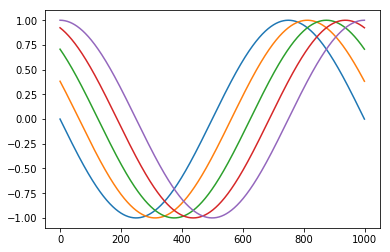

In [8]:
# generate sinusoidal data

t = np.linspace(0, 1, 1000)
X = []
lags = np.pi*np.array([0, 1./8, 1./4, 3./8, 1./2])
for lag in lags:
    X.append(np.sin(-2*np.pi*t + lag))
X = np.vstack(X)

print(X.shape)
for x in X:
    plt.plot(x)

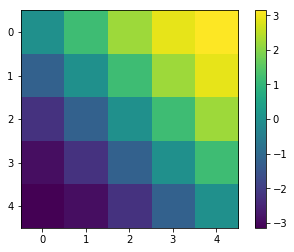

In [4]:
# Plot Signed Area for pairs of channels

Amat = np.zeros((len(lags), len(lags)))
for ind1, lag1 in enumerate(lags):
    for ind2, lag2 in enumerate(lags):
        Sij = S([ind1, ind2], X, 1000)
        Sji = S([ind2, ind1], X, 1000)
        Aij = (1./2)*(Sij - Sji)[-1]
        Amat[ind1, ind2] = Aij
plt.imshow(Amat)
plt.colorbar()

In [29]:
S12 = S([0, 1], X, 1000)
S21 = S([1, 0], X, 1000)
A12 = (1/2.)*(S12 - S21)
A12[-1]

A21 = (1/2.)*(S21 - S12)

Text(0.5,1,'A21')

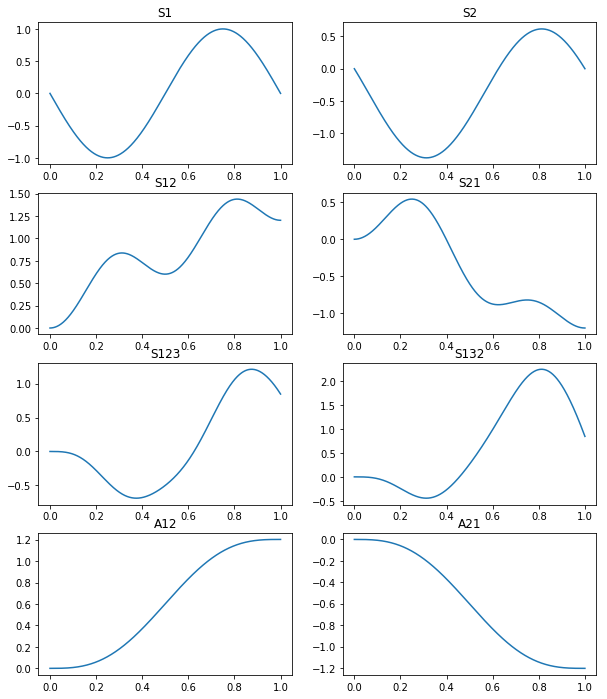

In [70]:
# plot example path signatures and signed areas

fig, ((ax0, ax00),(ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(4,
                                                    2,figsize=(10,12))
ax0.plot(t, S([0], X, 1000))
ax0.set_title("S1")

ax00.plot(t, S([1], X, 1000))
ax00.set_title("S2")

ax1.plot(t, S([0, 1], X, 1000))
ax1.set_title("S12")

ax2.plot(t, S([1, 0], X, 1000))
ax2.set_title("S21")

ax3.plot(t, S([0,1,2], X, 1000))
ax3.set_title("S123")

ax4.plot(t, S([0,2,1], X, 1000))
ax4.set_title("S132")

ax5.plot(t, A12)
ax5.set_title("A12")

ax6.plot(t, A21)
ax6.set_title("A21")


(10, 1000)


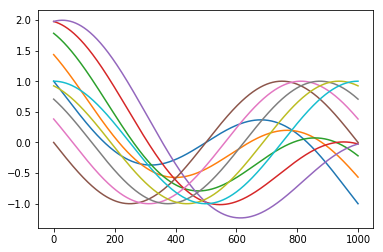

In [64]:
# generate more sinusoidal data

t = np.linspace(0, 1, 1000)
Y = []
ylags = np.pi*np.array([0, 1./8, 1./4, 3./8, 1./2])
for lag in ylags:
    Y.append(np.sin(-2*np.pi*t + lag))  

Z = []
zlags = np.pi*np.array([0, 1./7, 2./7, 3./7, 4./7])
for lag in zlags:
    Z.append(np.sin(-2*np.pi*t + lag)+np.cos(np.pi*t))
    
Z.append(Y)
Z = np.vstack(Z)

print(Z.shape)
for z in Z:
    plt.plot(z)

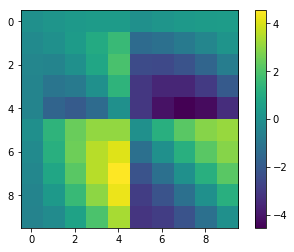

In [67]:
# Plot Signed Area for pairs of channels

lags = np.append(zlags, ylags)
Amat = np.zeros((len(lags), len(lags)))
for ind1, lag1 in enumerate(lags):
    for ind2, lag2 in enumerate(lags):
        Sij = S([ind1, ind2], Z, 1000)
        Sji = S([ind2, ind1], Z, 1000)
        Aij = (1./2)*(Sij - Sji)[-1]
        Amat[ind1, ind2] = Aij
plt.imshow(Amat)
plt.colorbar()

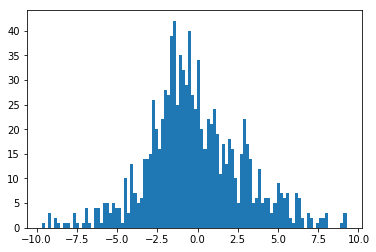

In [77]:
# Brief foray into examining the distribution of path signatures

lags = np.append(zlags, ylags)
Sijk_vals = []
for ind1, lag1 in enumerate(lags):
    for ind2, lag2 in enumerate(lags):
        for ind3, lag3 in enumerate(lags):
            Sijk = S([ind1, ind2, ind3], Z, 1000)
            Sijk_vals.append(Sijk[-1])
fig = plt.hist(Sijk_vals, bins=100)

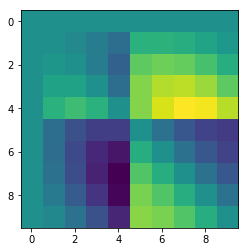

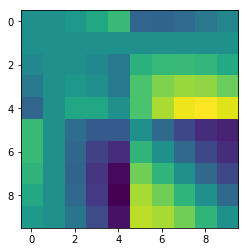

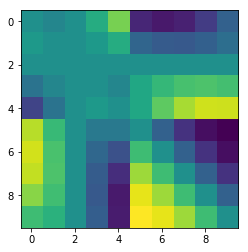

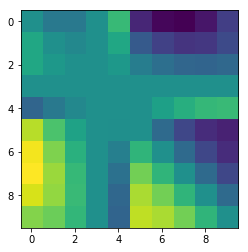

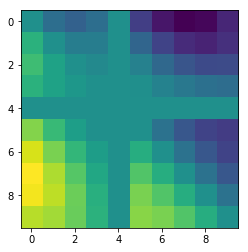

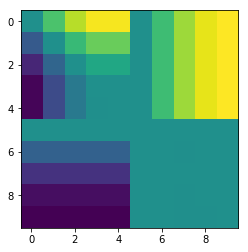

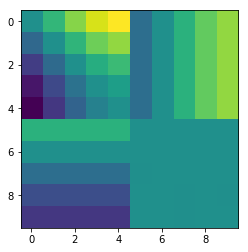

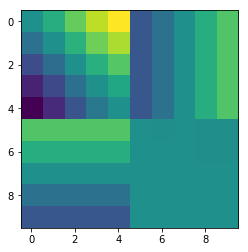

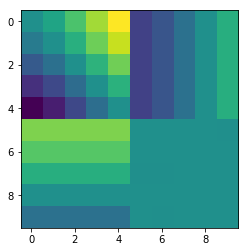

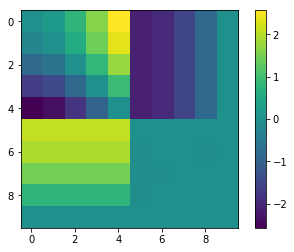

In [80]:
# Plot Signed Volume for triplets of channels

lags = np.append(zlags, ylags)
Amat = np.zeros((len(lags), len(lags), len(lags)))
for ind1, lag1 in enumerate(lags):
    for ind2, lag2 in enumerate(lags):
        for ind3, lag3 in enumerate(lags):
            Sijk = S([ind1, ind2, ind3], Z, 1000)
            Sjik = S([ind2, ind1, ind3], Z, 1000)
            Sjki = S([ind2, ind3, ind1], Z, 1000)
            Skji = S([ind3, ind2, ind1], Z, 1000)
            Skij = S([ind3, ind1, ind2], Z, 1000)
            Sikj = S([ind1, ind3, ind2], Z, 1000)
            Aijk = (1./6)*(Sijk - Sjik + Sjki - Skji + Skij - Sikj)[-1]
            Amat[ind1, ind2, ind3] = Aijk
for k in range(10):
    plt.figure()
    plt.imshow(Amat[:,:,k])
plt.colorbar()